In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import requests
from plotnine import *
import regex as re

In [181]:
# read data from csv file
raw_data = pd.read_csv('./datasets/suicide homicide gdp.csv', sep=',')
display(raw_data)

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


In [185]:
homicides = 'Intentional homicides (per 100,000 people)'
suicides = 'Suicide mortality rate (per 100,000 population)'
gdp = 'GDP (current US$)'
gdp_pc = 'GDP per capita, PPP (current international $)'

suicide_label = 'Suicide Rate Per 100,000 People'
gdp_pc_label = 'GDP Per Capita (PPP)'

data = raw_data.dropna(subset=[suicides, 'incomeLevel'])
data = data.drop(data[(data['year'] < 2000) | (data['incomeLevel'] == 'Aggregates') | (data['incomeLevel'] == 'Not classified')].index)
# data = data.astype({'year': 'str'})
data = data.drop(columns=[homicides, 'iso3c', 'iso2c'])
data = data.rename(columns={f'{gdp}': 'gdp', f'{gdp_pc}': 'gdp_pc', f'{suicides}': 'suicides'})
data = data[data['country'] != 'World']

display(data)

,country,year,suicides,gdp,gdp_pc,adminregion,incomeLevel
30,Afghanistan,2000,4.9,NaN,NaN,South Asia,Low income
31,Afghanistan,2001,5.0,NaN,NaN,South Asia,Low income
32,Afghanistan,2002,5.0,4.055180e+09,877.014268,South Asia,Low income
33,Afghanistan,2003,5.0,4.515559e+09,927.857548,South Asia,Low income
34,Afghanistan,2004,5.0,5.226779e+09,925.441429,South Asia,Low income
...,...,...,...,...,...,...,...
13560,Zimbabwe,2015,18.0,1.996312e+10,2679.507615,Sub-Saharan Africa (excluding high income),Lower middle income
13561,Zimbabwe,2016,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,2017,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,2018,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income


In [186]:
means_across_country = data.groupby(['country', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()
means_across_time = data.groupby(['year', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()

display(means_across_country)
display(means_across_time)

,country,incomeLevel,suicides,gdp,gdp_pc
0,Afghanistan,Low income,4.460,1.368449e+10,1590.205477
1,Albania,Upper middle income,5.875,1.035320e+10,8810.190584
2,Algeria,Lower middle income,3.330,1.409770e+11,11661.982095
3,Angola,Lower middle income,7.310,7.622280e+10,6011.694445
4,Antigua and Barbuda,High income,0.655,1.188067e+09,20205.652180
...,...,...,...,...,...
177,Vanuatu,Lower middle income,18.750,5.983245e+08,2645.018747
178,Vietnam,Lower middle income,6.940,1.242308e+11,4492.639897
179,"Yemen, Rep.",Low income,5.815,2.474981e+10,3525.223533
180,Zambia,Lower middle income,10.200,1.667534e+10,2822.771255


,year,incomeLevel,suicides,gdp,gdp_pc
0,2000,High income,13.941176,5.308934e+11,28417.190469
1,2000,Low income,8.348148,7.361866e+09,1102.303458
2,2000,Lower middle income,10.557407,2.835959e+10,2942.269817
3,2000,Upper middle income,12.100000,8.619339e+10,7163.240052
4,2001,High income,13.731373,5.260995e+11,29223.902058
...,...,...,...,...,...
75,2018,Upper middle income,9.350000,4.725870e+11,17202.977805
76,2019,High income,11.168627,1.055134e+12,48738.547358
77,2019,Low income,6.488889,1.742048e+10,1924.373552
78,2019,Lower middle income,9.687037,1.429378e+11,6552.216990


c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


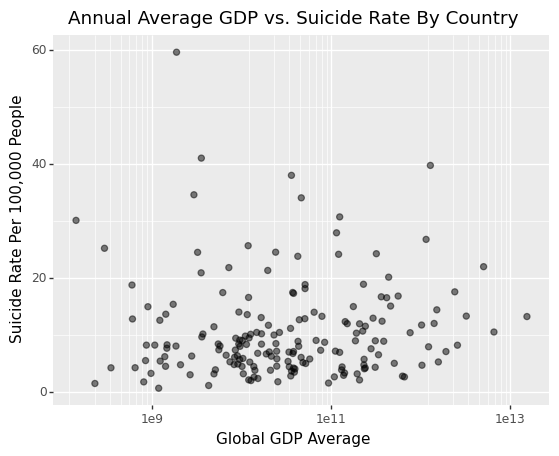

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


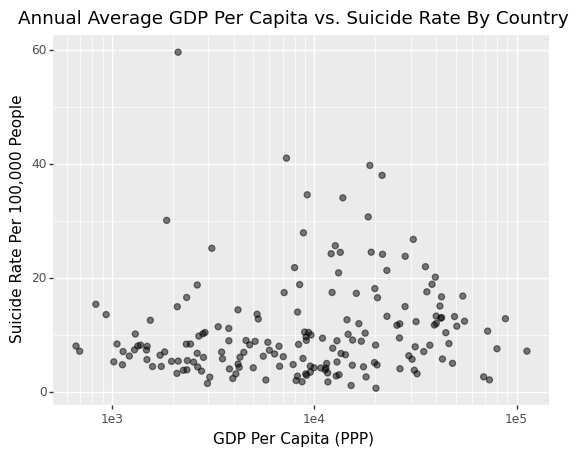

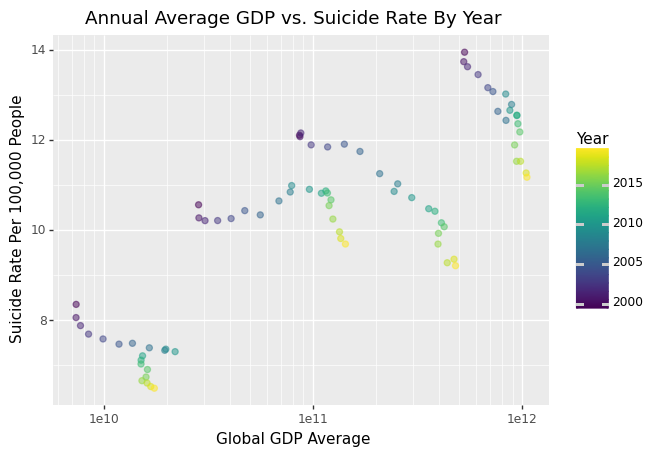

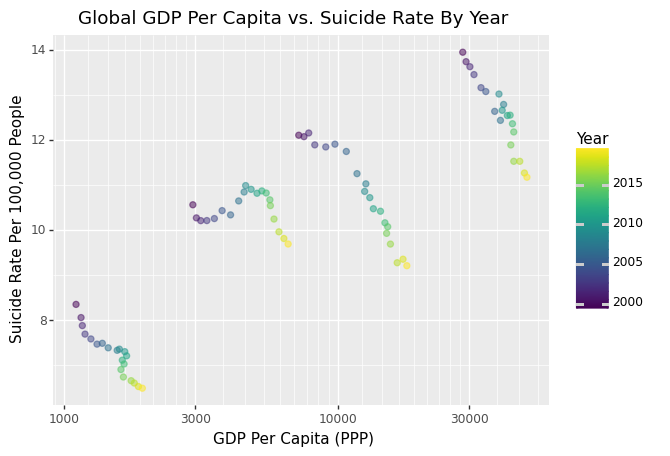

In [187]:
splot = ggplot(means_across_country, aes(x='gdp', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP vs. Suicide Rate By Country',
         x = 'Global GDP Average',
         y = suicide_label) + scale_x_log10()

print(splot)

splot = ggplot(means_across_country, aes(x='gdp_pc', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP Per Capita vs. Suicide Rate By Country',
         x = gdp_pc_label,
         y = suicide_label) + scale_x_log10()

print(splot)

splot = ggplot(means_across_time, aes(x='gdp', y='suicides', color='year')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP vs. Suicide Rate By Year',
         x = 'Global GDP Average',
         y = suicide_label,
         color = 'Year') + scale_x_log10()

print(splot)

splot = ggplot(means_across_time, aes(x='gdp_pc', y='suicides', color='year')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Global GDP Per Capita vs. Suicide Rate By Year',
         x = gdp_pc_label,
         y = suicide_label,
         color = 'Year') + scale_x_log10()

print(splot)

# data.plot(x='gdp', y='suicides', kind='scatter')
# data.plot(x='gdp_pc', y='suicides', kind='scatter')

In [78]:
# fit linear regression model for life expectancy vs. time
fitted_values_model = smf.ols(formula=f'gdp_pc ~ suicides', data=data).fit()

print(fitted_values_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 gdp_pc   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.65
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.60e-05
Time:                        23:26:14   Log-Likelihood:                -50408.
No. Observations:                4497   AIC:                         1.008e+05
Df Residuals:                    4495   BIC:                         1.008e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.407e+04    432.018     32.569      0.0

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


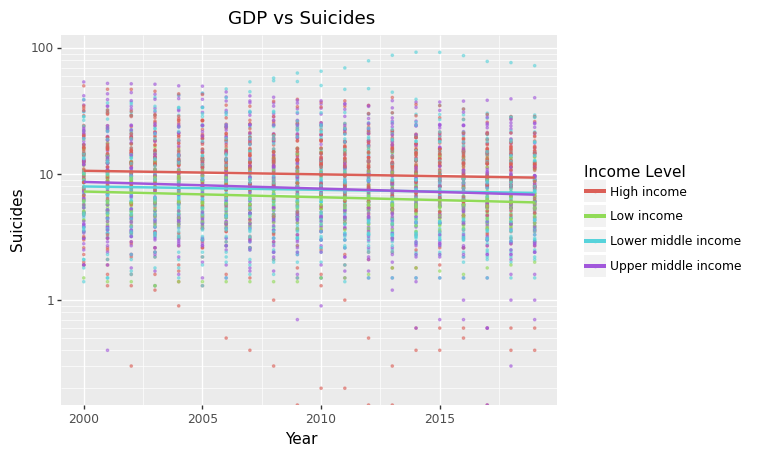

In [177]:
# splot = ggplot(data[(data['year'] >= 2000) & (data['incomeLevel'] != 'Aggregates') & (data['incomeLevel'] != 'Not classified')].dropna(subset=['incomeLevel']), aes(x='year', y='suicides', color='incomeLevel')) +\
#     geom_point(size=0.5, alpha=0.5) + stat_smooth(method='lm', se=False) +\
#     labs(title="GDP vs Suicides",
#          x = "Year",
#          y = "Suicides",
#          color = 'Income Level') + scale_y_log10()

# print(splot)

splot = ggplot(data, aes(x='year', y='suicides', color='incomeLevel')) +\
    geom_point(size=0.5, alpha=0.5) + stat_smooth(method='lm', se=False) +\
    labs(title="GDP vs Suicides",
         x = "Year",
         y = "Suicides",
         color = 'Income Level') + scale_y_log10()

print(splot)

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 966 rows containing missing values.


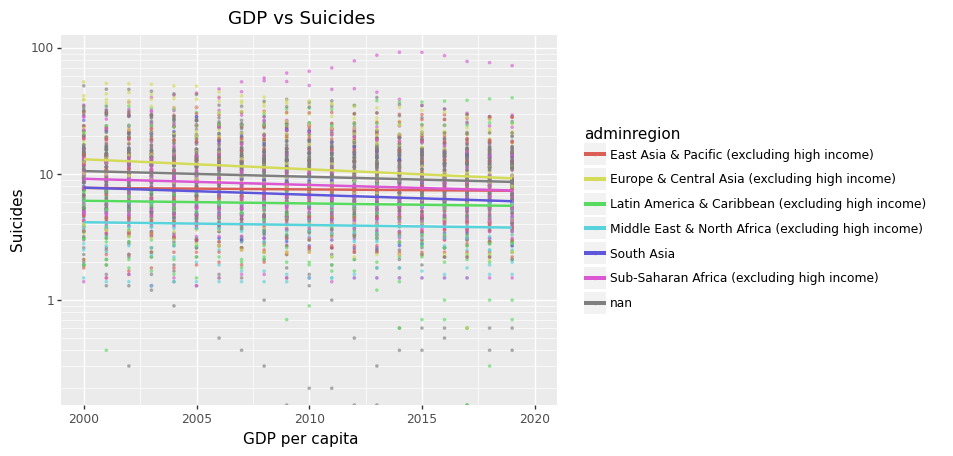

In [80]:
splot = ggplot(data[data['year'] >= 2000], aes(x='year', y='suicides', color='adminregion')) +\
    geom_point(size=0.5, alpha=0.5) + stat_smooth(method='lm', se=False) +\
    labs(title="GDP vs Suicides",
         x = "GDP per capita",
         y = "Suicides") + scale_y_log10()

print(splot)

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 9069 rows containing missing values.


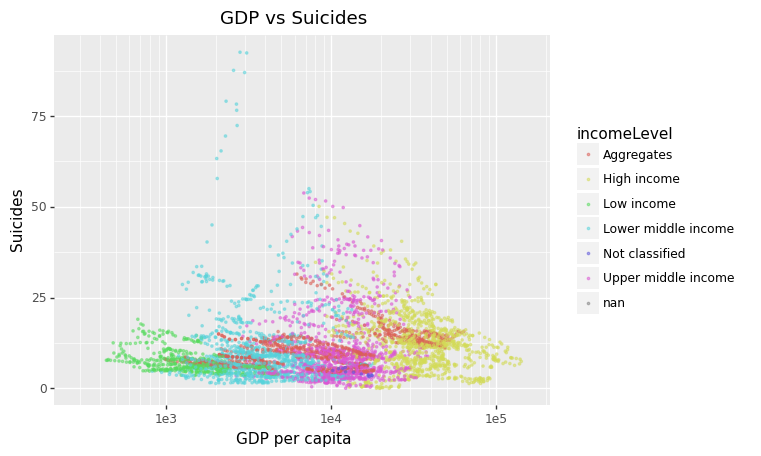

In [81]:
splot = ggplot(data, aes(x='gdp_pc', y='suicides', color='incomeLevel')) +\
    geom_point(size=0.5, alpha=0.5) +\
    labs(title="GDP vs Suicides",
         x = "GDP per capita",
         y = "Suicides") + scale_x_log10()

print(splot)

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 966 rows containing missing values.


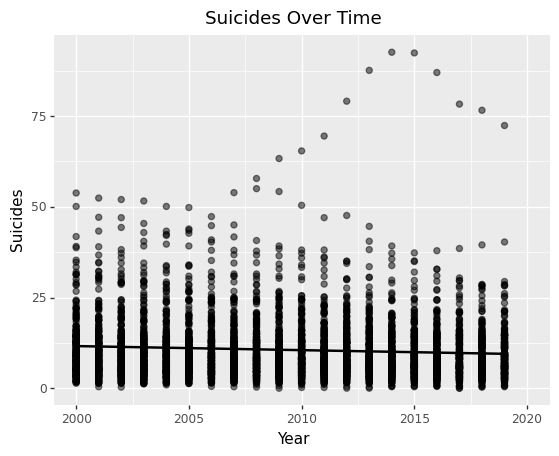

In [82]:
splot = ggplot(data[data['year'] >= 2000], aes(x='year', y='suicides')) +\
    geom_point(size=2, alpha=0.5) + stat_smooth(method='lm', se=False) +\
    labs(title="Suicides Over Time",
         x = "Year",
         y = "Suicides")

print(splot)

In [83]:
# cdc_data = requests.get('https://data.cdc.gov')
# display(cdc_data)
data = pd.read_csv('./datasets/sex_race_gender_suicide_data_us.csv')


# data = raw_data.drop(columns=['INDICATOR', 'STUB_NAME', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM'], axis=1)

# def find_cat(category, str, label):
#     match = re.search(str, label)
#     if match == None:
#         return 'All ' + category
#     else:
#         return match.group()

# re_str = r'(Male|Female)'
# data['SEX'] = data['STUB_LABEL'].apply(lambda label: find_cat('sex', re_str, label))

# re_str = r'(White|Black or African American|Asian or Pacific Islander|American Indian or Alaska Native)'
# data['RACE'] = data['STUB_LABEL'].apply(lambda label: find_cat('race', re_str, label))

# re_str = r'(Not Hispanic or Latino|Hispanic or Latino)'
# data['ETHNICITY'] = data['STUB_LABEL'].apply(lambda label: find_cat('ethnicity', re_str, label))

display(data)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


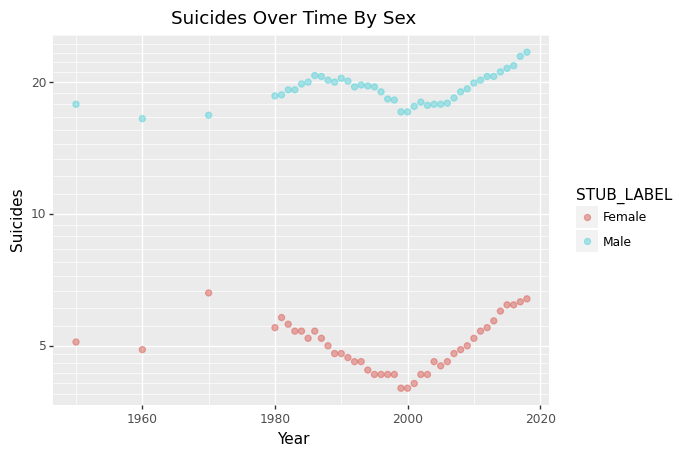

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 36 rows containing missing values.


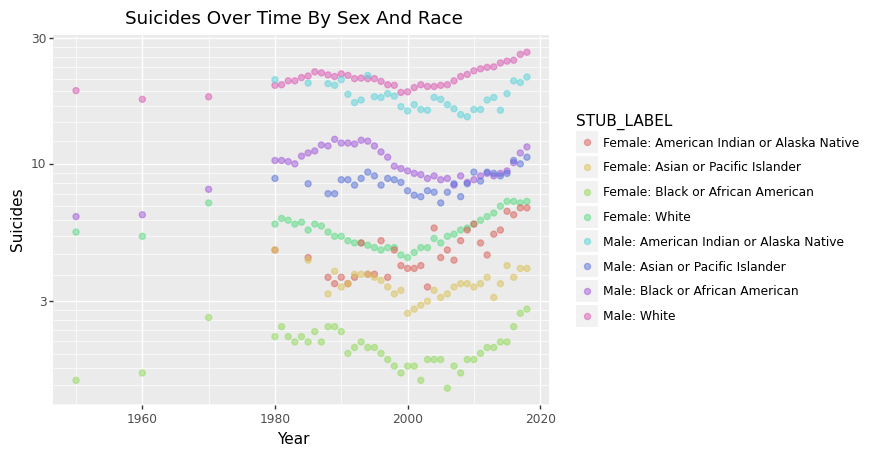

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 58 rows containing missing values.


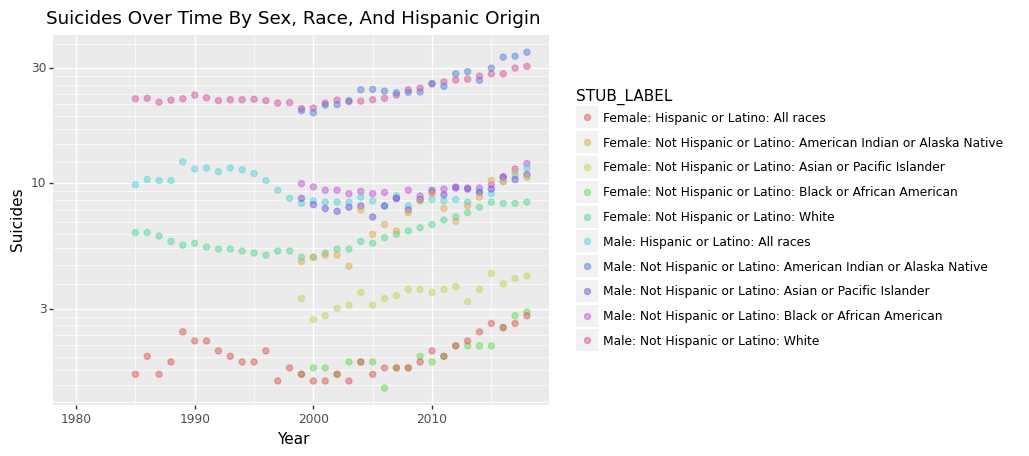

In [84]:
splot = ggplot(data[(data['UNIT_NUM'] == 2) & (data['STUB_NAME_NUM'] == 2)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title="Suicides Over Time By Sex",
         x = "Year",
         y = "Suicides") + scale_y_log10()

print(splot)

splot = ggplot(data[(data['UNIT_NUM'] == 2) & (data['STUB_NAME_NUM'] == 4)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title="Suicides Over Time By Sex And Race",
         x = "Year",
         y = "Suicides") + scale_y_log10()

print(splot)

splot = ggplot(data[(data['YEAR'] >= 1980) & (data['UNIT_NUM'] == 2) & (data['STUB_NAME_NUM'] == 6)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title="Suicides Over Time By Sex, Race, And Hispanic Origin",
         x = "Year",
         y = "Suicides") + scale_y_log10()

print(splot)

C:\Users\jange\AppData\Local\Temp\ipykernel_26904\3867557557.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


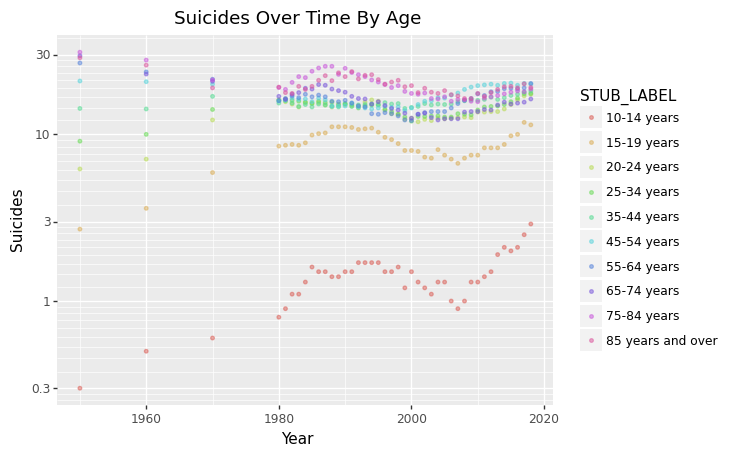

In [85]:
age_cat = r'(1[.]\d\d)|(1[.]1)'

splot = ggplot(data[data['STUB_LABEL_NUM'].astype(str).str.contains(age_cat)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=1, alpha=0.5) +\
    labs(title="Suicides Over Time By Age",
         x = "Year",
         y = "Suicides") + scale_y_log10()

print(splot)